In [ ]:
import numpy as np
import pandas as pd
from pandas import DataFrame as df
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from keras import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [ ]:
# Function for confusion metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns

def display_confusion_matrix(y_pred, y_actual):
    cm = confusion_matrix(y_actual, y_pred)

    # Create a figure and axes
    fig, ax = plt.subplots(figsize=(8, 6))

    # Create a heatmap of the confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)

    # Set labels, title, and ticks
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['Non-CVD', 'CVD'])
    ax.yaxis.set_ticklabels(['Non-CVD', 'CVD'])

    # Calculate and display other metrics if needed
    accuracy = (cm[0, 0] + cm[1, 1]) / cm.sum()
    recall = cm[1, 1] / (cm[1, 1] + cm[1, 0])
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
    print("Accuracy:", accuracy)
    print("Sensitivity/Recall:", recall)
    print("Specificity:", specificity)

    return cm, accuracy, recall, specificity

In [ ]:
# Function for DNN performance
def model_performance_DNN(x, model, y):
    hypo = model.predict(x)
    pred = np.where(hypo > 0.3, 1, 0).flatten() # relation to sigmoid activation function
    cm, accuracy, recall, specificity=display_confusion_matrix(pred, y)
    auc = roc_auc_score(y, hypo)

    print("AUC : ",auc)
    plt.show()
    return accuracy ,recall, specificity ,auc

In [ ]:
#LOAD DATASET
framingham=pd.read_csv('/content/drive/MyDrive/TFG/framingham.csv')

In [ ]:
data_filled = framingham.fillna(framingham.mean())
data_filled = data_filled[data_filled['glucose'] <= 250]

In [ ]:
#Change to int the variables that have values of 0 or 1 as they are categorical
columns_to_convert = ['BPMeds']
data_filled['BPMeds'] = data_filled['BPMeds'].astype(int)

In [ ]:
data_filled.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
# Data prep
data_x=data_filled.drop(columns=['TenYearCHD','education','BPMeds','prevalentStroke'])
data_y=data_filled.TenYearCHD

#Separate into training and test data
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size=0.3, random_state=3, stratify=data_y)
#Normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)


In [ ]:
data_y.value_counts() #THERE IS IMBALANCE

0    3590
1     631
Name: TenYearCHD, dtype: int64

In [ ]:
train_y.value_counts()

0    2512
1     442
Name: TenYearCHD, dtype: int64

In [ ]:
DNN = keras.Sequential(name="DNN")
DNN.add(keras.layers.Dense(64, input_dim=12, kernel_regularizer= keras.regularizers.l2(0.01),activation="elu", name="dense_1"))
DNN.add(keras.layers.Dense(32, kernel_regularizer= keras.regularizers.l2(0.01),activation='elu', name="dense_2")) # hidden layer
DNN.add(keras.layers.Dense(1,activation='sigmoid', name="output")) # output layer

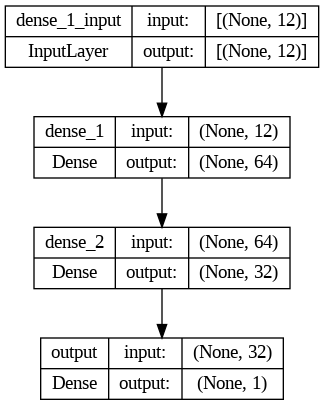

In [ ]:
from keras.utils import plot_model
plot_model(DNN, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
# Compile
DNN.compile(tf.keras.optimizers.Adam(learning_rate=0.0001),loss='binary_crossentropy', metrics=['AUC'])

In [ ]:
# fit the model
history = DNN.fit(train_x, train_y, batch_size=50, epochs=250)
train_loss = history.history['loss']

Epoch 1/250
60/60 [==============================] - 1s 2ms/step - loss: 1.3176 - auc: 0.4296
Epoch 2/250
60/60 [==============================] - 0s 2ms/step - loss: 1.2085 - auc: 0.5072
Epoch 3/250
60/60 [==============================] - 0s 2ms/step - loss: 1.1390 - auc: 0.5847
Epoch 4/250
60/60 [==============================] - 0s 2ms/step - loss: 1.0864 - auc: 0.6321
Epoch 5/250
60/60 [==============================] - 0s 2ms/step - loss: 1.0436 - auc: 0.6629
Epoch 6/250
60/60 [==============================] - 0s 2ms/step - loss: 1.0074 - auc: 0.6725
Epoch 7/250
60/60 [==============================] - 0s 2ms/step - loss: 0.9751 - auc: 0.6858
Epoch 8/250
60/60 [==============================] - 0s 2ms/step - loss: 0.9463 - auc: 0.6888
Epoch 9/250
60/60 [==============================] - 0s 2ms/step - loss: 0.9200 - auc: 0.6939
Epoch 10/250
60/60 [==============================] - 0s 2ms/step - loss: 0.8965 - auc: 0.6940
Epoch 11/250
60/60 [==============================] - 0s 2m

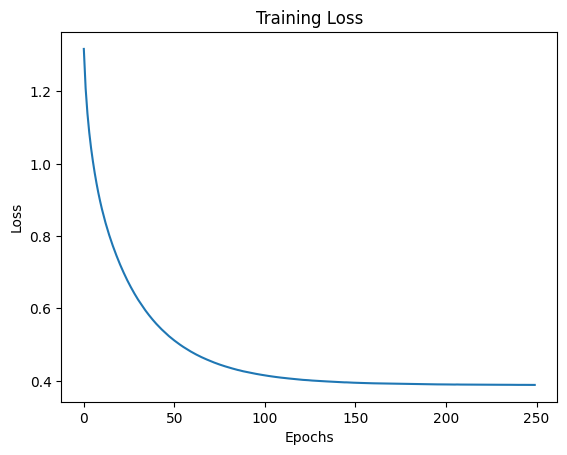

In [ ]:
# Plot the training loss
plt.plot(range(len(train_loss)), train_loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

40/40 [==============================] - 0s 1ms/step
Accuracy: 0.8334648776637726
Sensitivity/Recall: 0.2275132275132275
Specificity: 0.9397031539888683
AUC :  0.7404560669866792


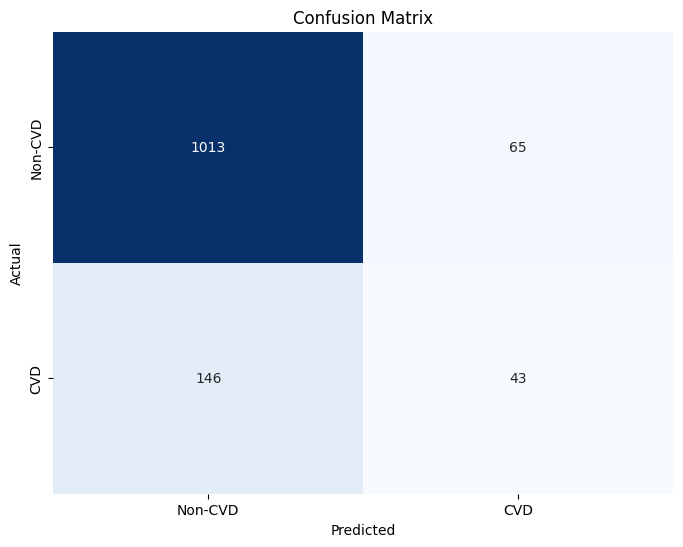

(0.8334648776637726,
 0.2275132275132275,
 0.9397031539888683,
 0.7404560669866792)

In [ ]:
# Prediction using validation data
test_actual_value = test_y.values
model_performance_DNN(test_x, DNN, test_actual_value)